# Data Story

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


Bad key "text.kerning_factor" on line 4 in
/Users/prashantsingh/opt/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


In [2]:
df = pd.read_csv("../Springboard Project/Data_Wrangling.csv")
data = pd.read_csv("../Springboard Project/cleanning.csv")

In [3]:
#checking the top five value columns and rows.
data.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,0,0.00,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [4]:
#Summary Analysis.
data.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.090910,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.597283,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.040000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.370000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,1.580000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [5]:
#find which columns has NAN values
data.isnull().sum()

id                                 0
name                              16
host_id                            0
host_name                         21
neighbourhood_group                0
neighbourhood                      0
latitude                           0
longitude                          0
room_type                          0
price                              0
minimum_nights                     0
number_of_reviews                  0
last_review                        0
reviews_per_month                  0
calculated_host_listings_count     0
availability_365                   0
dtype: int64

In [6]:
#When we check the columns, 'name' and 'host_name' are irrelevant with our fruther work. We can drop them directly.
data.drop(['name','host_name'],axis=1,inplace=True)

In [7]:
#find which columns has NAN values
data.isnull().sum()

id                                0
host_id                           0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
last_review                       0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

In [8]:
# Let's check our data info for datatypes again
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   host_id                         48895 non-null  int64  
 2   neighbourhood_group             48895 non-null  object 
 3   neighbourhood                   48895 non-null  object 
 4   latitude                        48895 non-null  float64
 5   longitude                       48895 non-null  float64
 6   room_type                       48895 non-null  object 
 7   price                           48895 non-null  int64  
 8   minimum_nights                  48895 non-null  int64  
 9   number_of_reviews               48895 non-null  int64  
 10  last_review                     48895 non-null  object 
 11  reviews_per_month               48895 non-null  float64
 12  calculated_host_listings_count  

In [9]:
save=data.to_csv("Stats.csv",index=False)

# EXPLORING AND VISIUALIZING DATA

## 1.Top 5 host_id 

In [10]:
#Find top 5 hosts with highest number of listings
top_5_host_id = data.host_id.value_counts().head(5)

In [11]:
#Top host_id value counts.
top_5_host_id

219517861    327
107434423    232
30283594     121
137358866    103
12243051      96
Name: host_id, dtype: int64

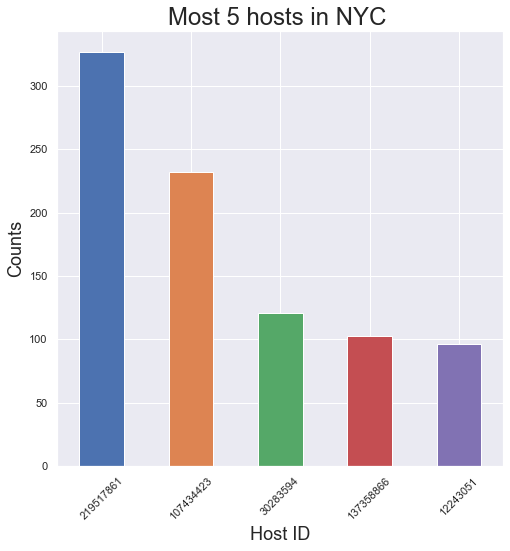

In [12]:
#Plot the top_5_host_id 
sns.set(rc={'figure.figsize':(8,8),"axes.titlesize":24,"axes.labelsize":18})
top_5_host_id.plot(kind="bar" , color=['C0','C1','C2','C3','C4','C5'])
plt.ylabel('Counts')
plt.xlabel('Host ID')
plt.title('Most 5 hosts in NYC ')
plt.xticks(rotation=45)
plt.titlesize=24
plt.labelsize=18
plt.savefig('top 5 host id')
plt.show()

We can clearly see below the top five host_id counts. First host_id has more than 300+ count and second host_id  has around 230 count.

# 2.Neighbourhood_group distribution

In [13]:
#Counts of different neighourhood_group
neigh = data.neighbourhood_group.value_counts()
neigh

Manhattan        21661
Brooklyn         20104
Queens            5666
Bronx             1091
Staten Island      373
Name: neighbourhood_group, dtype: int64

In [14]:
#Percentage coverage as per different neighourhood_group.
neigh = data.neighbourhood_group.value_counts(normalize=True)
neigh

Manhattan        0.443011
Brooklyn         0.411167
Queens           0.115881
Bronx            0.022313
Staten Island    0.007629
Name: neighbourhood_group, dtype: float64

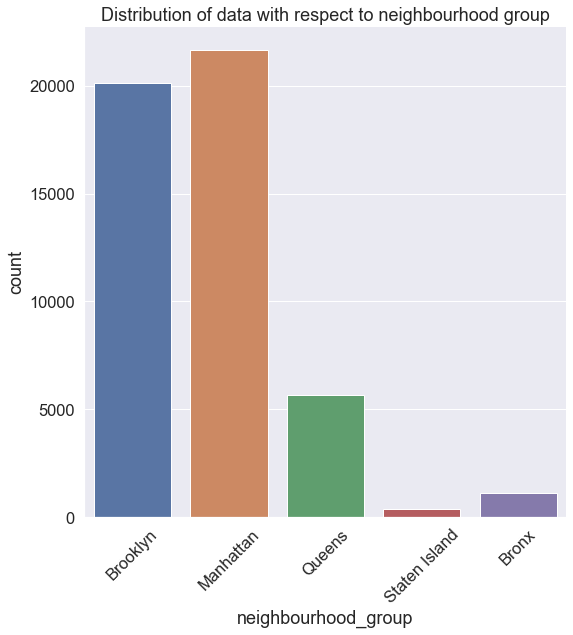

In [15]:
sns.set(font_scale=1.5)
sns.catplot("neighbourhood_group", data=data, kind="count", height=8)
plt.xticks(rotation=45)
plt.title('Distribution of data with respect to neighbourhood group')
plt.savefig('Distribution of data with respect to neighbourhood group')

When I checked the below distribution of neighbourhood_group, Manhattan has the highest listing counts to all the other neighbourhood_group. Brooklyn is the only listing which is closer to Manhattan. We can say that most of the hosts in New York City are in Manhattan and Brooklyn. Staten Island and Bronx have very low hosts.

# 3.Relationship between Room Types and Neighbourhood Group

In [16]:
#Comparing the neighbourhood_group with respect to room_type column.
neigh_group = data.groupby('neighbourhood_group').room_type.value_counts()
neigh_group

neighbourhood_group  room_type      
Bronx                Private room         652
                     Entire home/apt      379
                     Shared room           60
Brooklyn             Private room       10132
                     Entire home/apt     9559
                     Shared room          413
Manhattan            Entire home/apt    13199
                     Private room        7982
                     Shared room          480
Queens               Private room        3372
                     Entire home/apt     2096
                     Shared room          198
Staten Island        Private room         188
                     Entire home/apt      176
                     Shared room            9
Name: room_type, dtype: int64

In [17]:
#Unstack the neighbourhood_group with respect to room_type
neigh_group.unstack()

room_type,Entire home/apt,Private room,Shared room
neighbourhood_group,,,
Bronx,379,652,60
Brooklyn,9559,10132,413
Manhattan,13199,7982,480
Queens,2096,3372,198
Staten Island,176,188,9


In [18]:
#Percentage coverage as per different neighourhood_group.
room_type = data.room_type.value_counts(normalize=True)
room_type

Entire home/apt    0.519665
Private room       0.456611
Shared room        0.023724
Name: room_type, dtype: float64

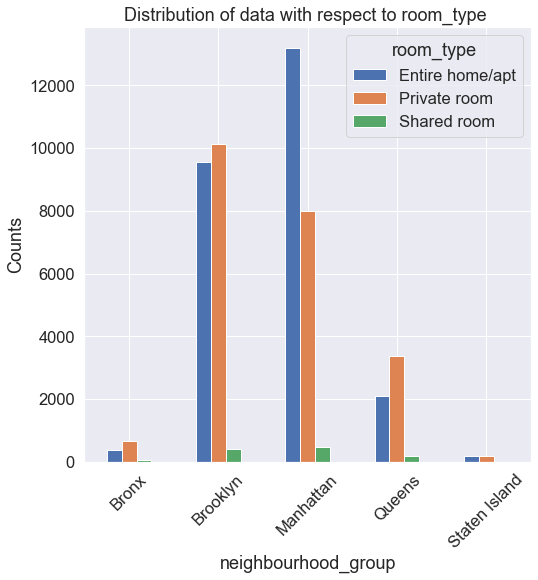

In [19]:
#plot the neigh_group with repsect to different room_type.
neigh_group.unstack().plot(kind='bar')
plt.xticks(rotation=45) , 
plt.xlabel("neighbourhood_group") 
plt.ylabel("Counts")
plt.title("Distribution of data with respect to room_type ")
plt.savefig("Distribution of data with respect to room_type")

When we check the relationship between neighbourhood group and room type distribution, we can say Manhattan and Brooklyn have a high number of listings for each room type. ‘Entire home/apt’ and ‘Private room’ are most frequently choice in New York and ‘Shared room’ is considered to be the least choice.
In the Manhattan neighbourhood group we see ‘Entire apt/home’ has the highest number of listings. ‘Private room’ is the second place.
In the Brooklyn neighbourhood group we see ‘Private room’ has the highest number of listings and ‘Entire home/apt’ is the second place. 
In the Staten Island neighbourhood group both ‘Entire home/apt' and ‘Private room’ host listings are similar. 


## 4.Relationship between Room Types and Neighbourhood

### Top 10 neighbourhood

In [20]:
#top 10th neighbourhood
top_count=data['neighbourhood'].value_counts()
top_count.head(10)

Williamsburg          3920
Bedford-Stuyvesant    3714
Harlem                2658
Bushwick              2465
Upper West Side       1971
Hell's Kitchen        1958
East Village          1853
Upper East Side       1798
Crown Heights         1564
Midtown               1545
Name: neighbourhood, dtype: int64

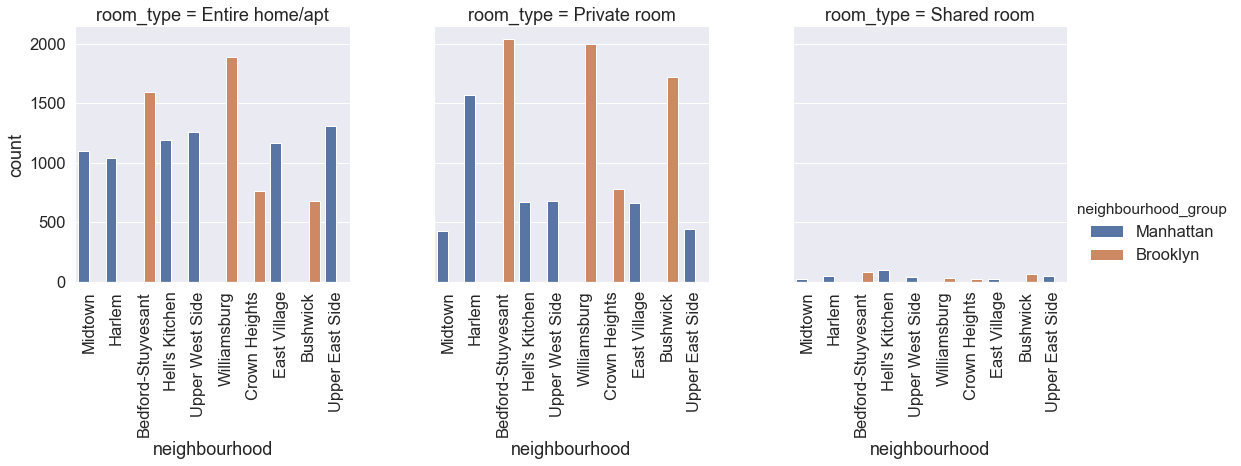

In [21]:
#Plot the separate distribustion room_type with respect to top_count(neighbourhood).
neibrhood_grb=data.loc[data['neighbourhood'].isin(top_count.head(10).index)]
viasul2=sns.catplot(x='neighbourhood', hue='neighbourhood_group', col='room_type', data=neibrhood_grb, kind='count')
viasul2.set_xticklabels(rotation=90)

We find the top 10 neighbourhoods with respect to room type. We can say    most hosts prefer ‘Entire home/apt’ and ‘Private room’. ‘Shared room’ has less number of hosts and is considered to be the first choice . This may be because of a high effective or less number of rooms. Again Manhattan and Brooklyn are favorite destination places with high numbers of host listings.



# 5.Room Type distribution

In [22]:
#Counts of different room_types..
room_type = data.room_type.value_counts()
room_type

Entire home/apt    25409
Private room       22326
Shared room         1160
Name: room_type, dtype: int64

In [23]:
#unique room_type in dataset.
room_labels=list(data['room_type'].unique())
room_labels

['Private room', 'Entire home/apt', 'Shared room']

In [24]:
#count of each room_type.
room_type = list(data.room_type.value_counts())
room_type

[25409, 22326, 1160]

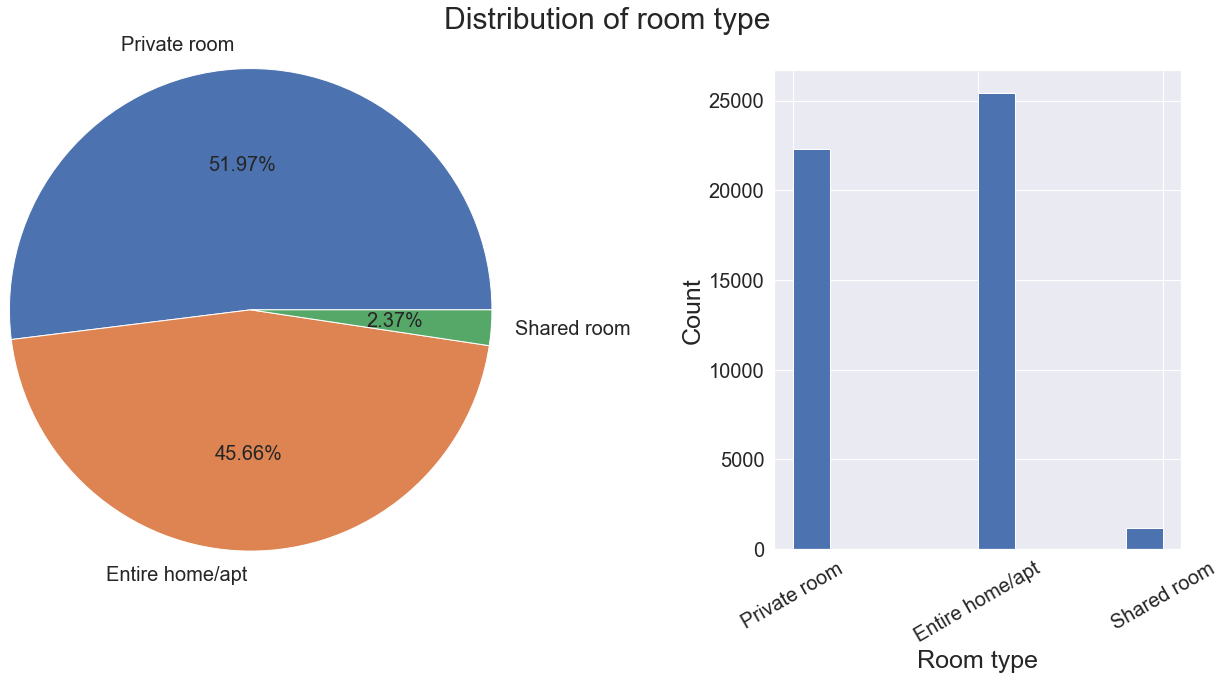

In [25]:
#Distribution of room_type.
fig = plt.figure()
fig.set_figheight(10)
fig.set_figwidth(18)
plt.subplot(1, 2, 1)
plt.axis('equal')
plt.pie(room_type,labels=room_labels,radius=1.5,autopct='%0.2f%%',textprops={'fontsize': 20})
plt.subplot(1, 2, 2)
plt.hist(x=data['room_type'])
plt.xlabel('Room type',fontsize=25)
plt.ylabel('Count',fontsize=25)
plt.xticks(fontsize=20, rotation=30)
plt.yticks(fontsize=20)
fig.tight_layout(pad=2.2)
fig.suptitle('Distribution of room type',fontsize=30)
plt.savefig("Distribution of room type")
plt.show()

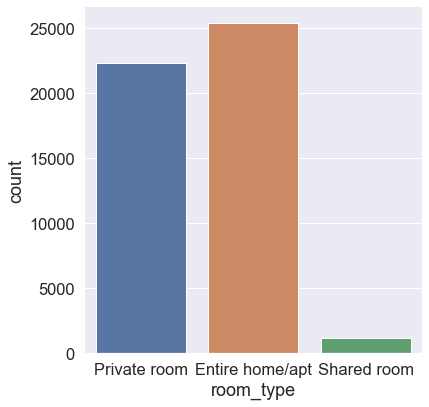

In [26]:
sns.set(font_scale=1.5)
sns.catplot("room_type", data=data, kind="count", height=6)

When we check the listing distribution of room types in New York City. Entire home or apartment counts are like 25000, private rooms are about 23000 and shared rooms are like 1160. Counts of private rooms and entire home /apt are very close to each other and shared room count is very low. We can see that Entire home apartment has the highest number followed by the private room, and least prefered is the shared room. 


# 6.Price distribution

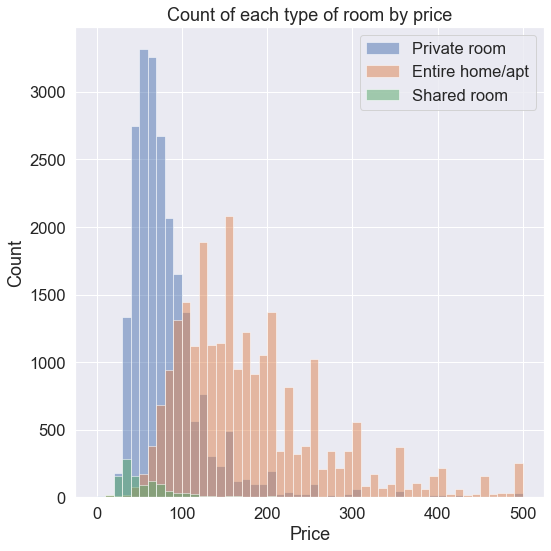

In [27]:
#visualize the categorical values for the room_type
categories = data['room_type'].unique()
bin_range=(0,500)
for c in categories:
    plt.hist(data[data['room_type']==c]['price'],alpha=0.5, label=c, range=bin_range,bins=50)
plt.legend()
plt.ylabel('Count')
plt.xlabel('Price')
plt.title('Count of each type of room by price')
plt.tight_layout()
plt.savefig('Price and Count Relationship')

In [28]:
# Price distribution with respect to interval.
df['price'] = pd.cut(x=df['price'], bins = [1,100,500,1000,1500,2000,2500])

In [29]:
df['price'].value_counts(sort=False)

(1, 100]        23917
(100, 500]      23923
(500, 1000]       805
(1000, 1500]      100
(1500, 2000]       53
(2000, 2500]       20
Name: price, dtype: int64

I notice that most of the prices are distributed between $40-100 per day. The number of prices are very low above 400. 
Entire home prices are distributed between 40-400 than Private room and Shared room.
Private room has prices ranging between 40-200.Shared room range between 0-100 prices with less host listings.

## 7.Price Distribution for Neighbourhood Group

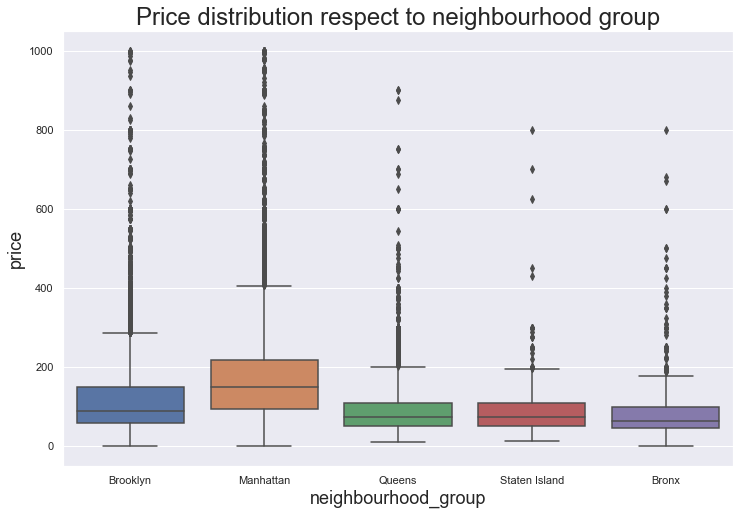

In [30]:
sns.set(rc={'figure.figsize':(12,8),"axes.titlesize":24,"axes.labelsize":18})
df1=data[data['price']<1000]
sns.boxplot(data=df1,x='neighbourhood_group',y='price').set_title('Price distribution respect to neighbourhood group')
plt.show()

Mean of price for Manhattan is higher than others. Brooklyn consider to be second highest mean when compare to rest.
Queens and Staten Island mean is similar.

# 8.Price Distribution for Room Types

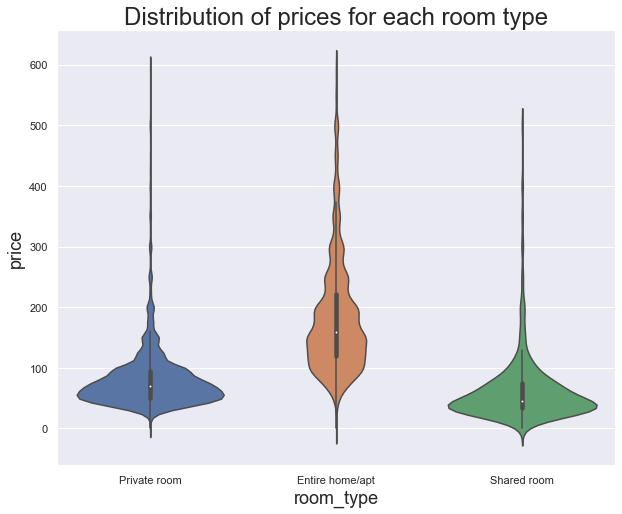

In [31]:
sns.set(rc={'figure.figsize':(10,8),"axes.titlesize":24,"axes.labelsize":18})
df2=data[data.price<600]
visual3=sns.violinplot(data=df2, x='room_type', y='price')
visual3.set_title('Distribution of prices for each room type')
plt.show()

Mean price for Entire home/apt is 150 in room types. Also, it has the highest range. The mean of private room price is 75 and the mean for shared room is 50.

# 9.Distributions in Maps

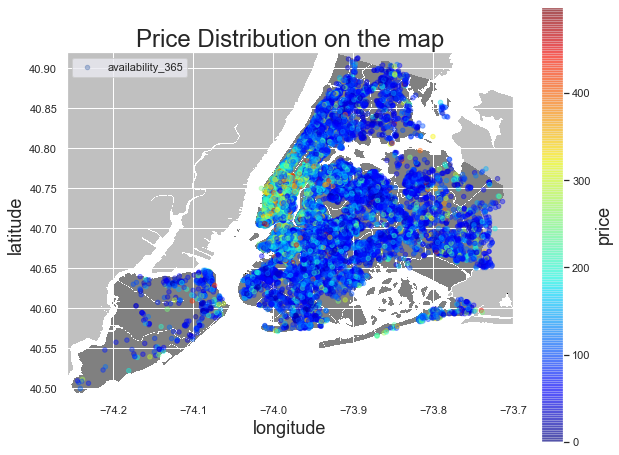

In [32]:
import urllib
#initializing the figure size
plt.figure(figsize=(10,8))
#loading the png NYC image found on Google and saving to my local folder along with the project
i=urllib.request.urlopen('https://upload.wikimedia.org/wikipedia/commons/e/ec/Neighbourhoods_New_York_City_Map.PNG')
nyc_img=plt.imread(i)
#scaling the image based on the latitude and longitude max and mins for proper output
plt.imshow(nyc_img,zorder=0,extent=[-74.258, -73.7, 40.49,40.92])
ax=plt.gca()
df3=data[data.price<500]
df3.plot(kind='scatter', x='longitude', y='latitude', label='availability_365', c='price', ax=ax, 
           cmap=plt.get_cmap('jet'), colorbar=True, alpha=0.4, zorder=5)
plt.title('Price Distribution on the map',fontsize=24)
plt.legend()
plt.show()

Red color dots are the apartment or rooms with higher price. We can see that the Manhattan region has more expensive apartments. Blue dots covers more area & affordable price in every region. The Bronx is the cheapest and denoted as Green dots.	

# 10.Minimum Nights
### The minimum stay for a visit, as posted by the host.

In [33]:
data.minimum_nights.value_counts().head(10)

1     12720
2     11696
3      7999
30     3760
4      3303
5      3034
7      2058
6       752
14      562
10      483
Name: minimum_nights, dtype: int64

Text(0, 0.5, 'count')

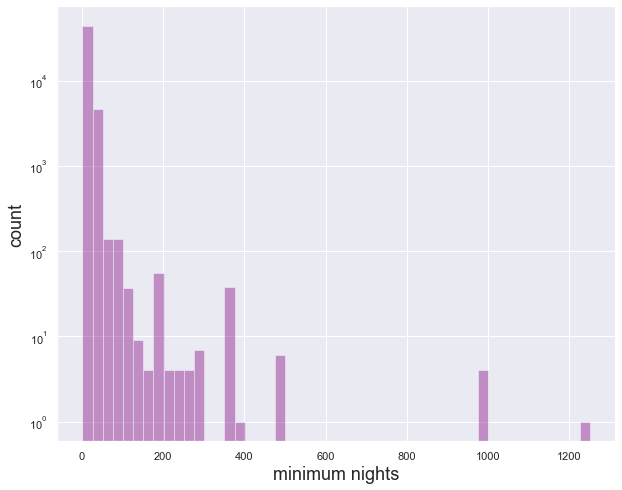

In [34]:
visual2=sns.distplot(data['minimum_nights'], rug=False, kde=False, color="purple")
visual2.set_yscale('log')
visual2.set_xlabel('minimum nights')
visual2.set_ylabel('count')

Most of the customers stays minimum 3 to 4 days and almost they spends $40-$100 prices in Entire home/apt or Private room type.

# 11.Availability Counts in a Year
### availability_365: The number of days for which a particular host is available in a year.

In [35]:
data.availability_365.value_counts().head(10)

0      17533
365     1295
364      491
1        408
89       361
5        340
3        306
179      301
90       290
2        270
Name: availability_365, dtype: int64

In [36]:
# Availability distribution with respect to interval.
availability_365= pd.cut(x=df['availability_365'], bins = [1,50,100,150,200,250,300,350,365])
availability_365.value_counts(sort=False)

(1, 50]       6987
(50, 100]     4842
(100, 150]    2312
(150, 200]    3480
(200, 250]    2345
(250, 300]    2880
(300, 350]    4750
(350, 365]    3358
Name: availability_365, dtype: int64

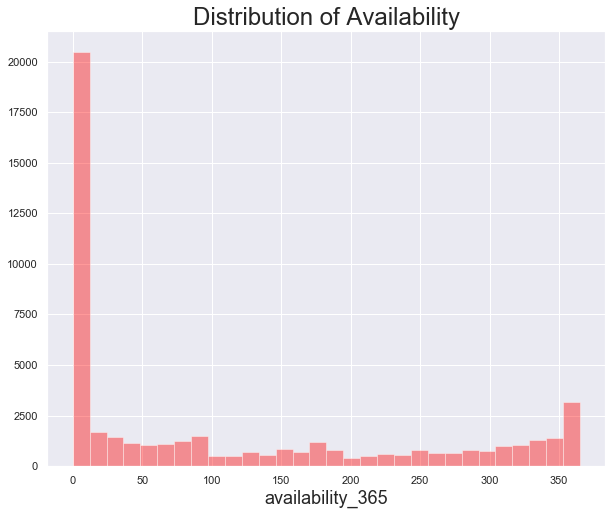

In [37]:
visual3=sns.distplot(data['availability_365'],rug=False,kde=False, color='red')
visual3.set_title('Distribution of Availability')
plt.show()

We can see high availability range between 0-10 and then moderate level.